<a href="https://colab.research.google.com/github/agherashyam2000/agherashyam2000-Covid_19_Prediction_And_Forecasting/blob/main/Covid_19_Prediction_And_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
covid = pd.read_csv("covid_19_data.csv")
covid.head(12)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [3]:
print("Size/Shape of dataset is : ", covid.shape)
print("Total null values in data set is : ", covid.isnull().sum())
print("Datatype of dataset is : ", covid.dtypes)

Size/Shape of dataset is :  (18327, 8)
Total null values in data set is :  SNo                   0
ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64
Datatype of dataset is :  SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [4]:
# Dropping SNo column
covid.drop(["SNo"], 1, inplace=True)

In [5]:
covid.isnull().sum()

ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [6]:
covid["ObservationDate"] = pd.to_datetime(covid["ObservationDate"])

In [7]:
covid["ObservationDate"]

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
18322   2020-04-24
18323   2020-04-24
18324   2020-04-24
18325   2020-04-24
18326   2020-04-24
Name: ObservationDate, Length: 18327, dtype: datetime64[ns]

In [8]:
# Grouping different types of cases as per the date
datewise = covid.groupby(["ObservationDate"]).agg({"Confirmed":"sum", "Recovered":"sum", "Deaths":"sum"})

In [9]:
print("Basic Information: ")
print("Total no of Confirmed cases all around the world is : ", datewise["Confirmed"].iloc[-1])
print("Total no of Recovered cases all around the world is : ", datewise["Recovered"].iloc[-1])
print("Total no of Deaths cases all around the world is : ", datewise["Deaths"].iloc[-1])
print("Total no of Active cases all around the world is : ", (datewise["Confirmed"].iloc[-1] - datewise["Recovered"].iloc[-1] - datewise["Deaths"].iloc[-1]))
print("Total no of Closed cases all around the world is : ", (datewise["Recovered"].iloc[-1] + datewise["Deaths"].iloc[-1]))

Basic Information: 
Total no of Confirmed cases all around the world is :  2811193.0
Total no of Recovered cases all around the world is :  793601.0
Total no of Deaths cases all around the world is :  197159.0
Total no of Active cases all around the world is :  1820433.0
Total no of Closed cases all around the world is :  990760.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

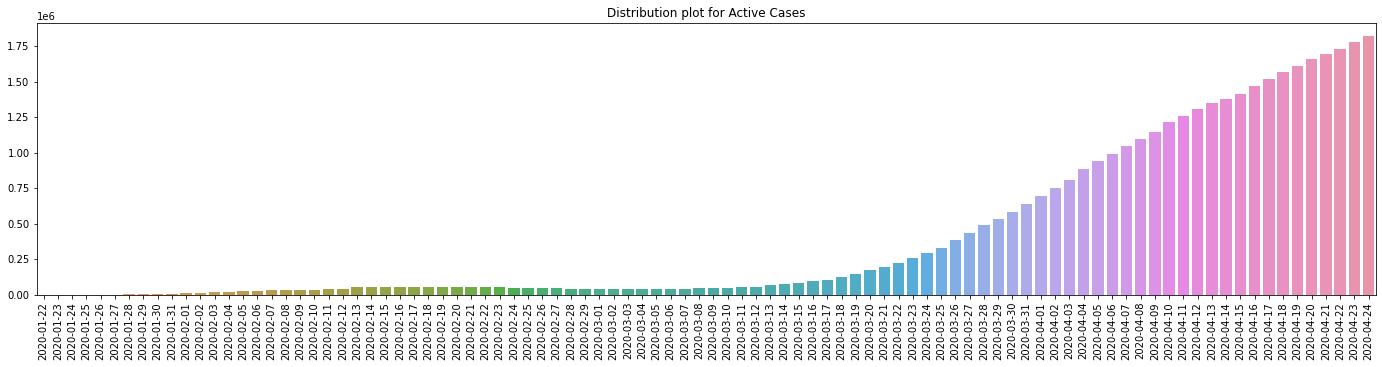

In [10]:
plt.figure(figsize=(24, 5))
sns.barplot(x=datewise.index.date, y=(datewise["Confirmed"] - datewise["Recovered"] - datewise["Deaths"]))
plt.title("Distribution plot for Active Cases")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

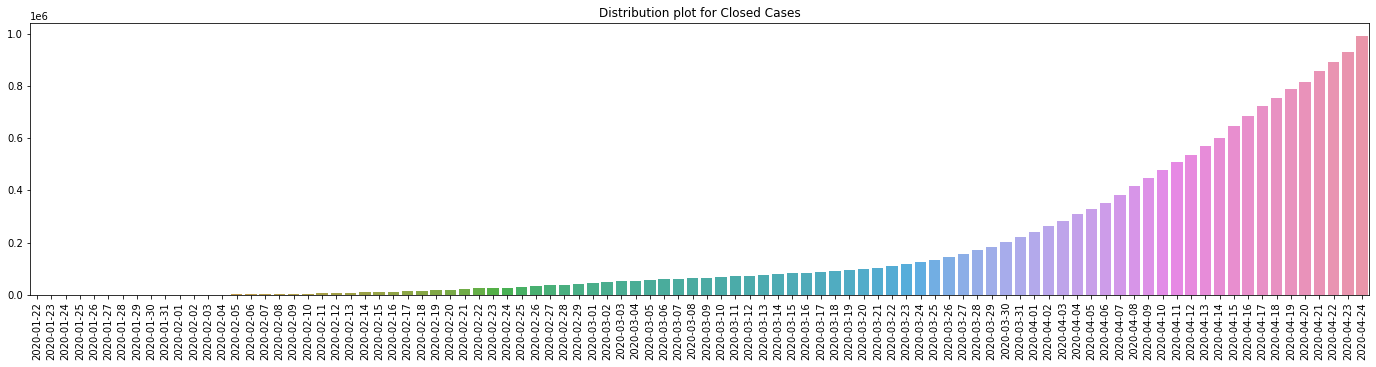

In [11]:
plt.figure(figsize=(24, 5))
sns.barplot(x=datewise.index.date, y=(datewise["Recovered"] + datewise["Deaths"]))
plt.title("Distribution plot for Closed Cases")
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Weekly Progress of different types of cases')

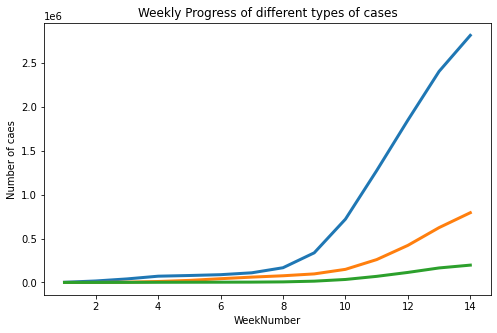

In [12]:
datewise["WeekofYear"] = datewise.index.weekofyear
week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
w = 1
for i in list(datewise["WeekofYear"].unique()):
  weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
  weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
  weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
  week_num.append(w)
  w = w + 1

plt.figure(figsize=(8,5))
plt.plot(week_num, weekwise_confirmed, linewidth=3)
plt.plot(week_num, weekwise_recovered, linewidth=3)
plt.plot(week_num, weekwise_deaths, linewidth=3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of caes")
plt.title("Weekly Progress of different types of cases")

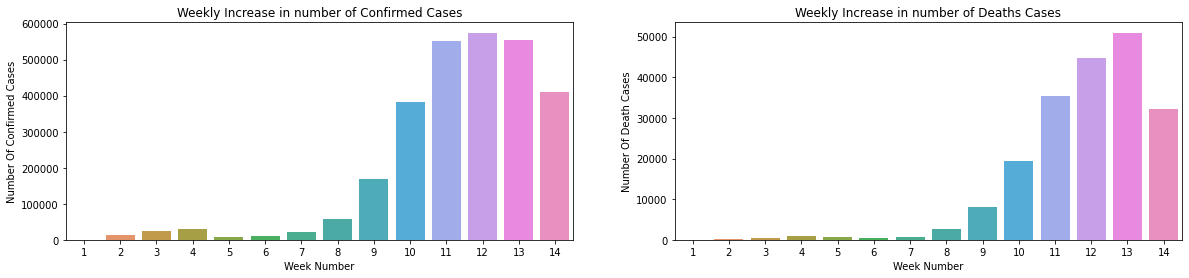

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
sns.barplot(x = week_num, y = pd.Series(weekwise_confirmed).diff().fillna(0), ax = ax1)
sns.barplot(x = week_num, y = pd.Series(weekwise_deaths).diff().fillna(0), ax = ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number Of Confirmed Cases")
ax2.set_ylabel("Number Of Death Cases")
ax1.set_title("Weekly Increase in number of Confirmed Cases")
ax2.set_title("Weekly Increase in number of Deaths Cases")
plt.show()

Average increase in number of Confirmed Cases everyday:  29900.0
Average increase in number of Recovered Cases everyday:  8442.0
Average increase in number of Deaths Cases everyday:  2097.0


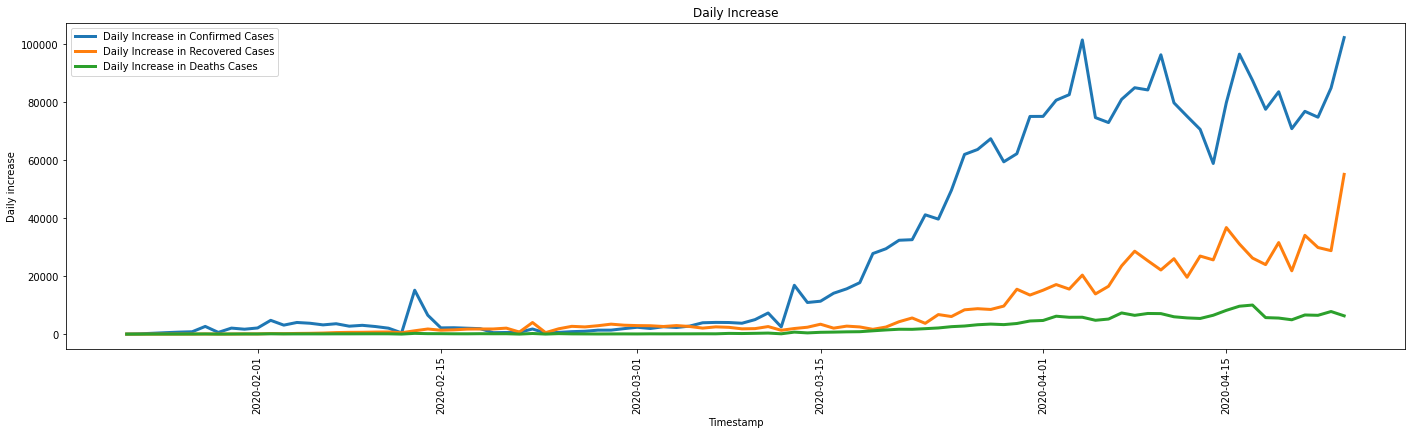

In [14]:
print("Average increase in number of Confirmed Cases everyday: ", np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered Cases everyday: ", np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths Cases everyday: ", np.round(datewise["Deaths"].diff().fillna(0).mean()))

plt.figure(figsize=(24,6))
plt.plot(datewise["Confirmed"].diff().fillna(0), label="Daily Increase in Confirmed Cases", linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0), label="Daily Increase in Recovered Cases", linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0), label="Daily Increase in Deaths Cases", linewidth=3)

plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily Increase")
plt.legend()
plt.xticks(rotation = 90)
plt.show()

In [15]:
# Countrywise Analysis
# Calculating Countrywise Mortality rate
countrywise = covid[covid["ObservationDate"] == covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum", "Recovered":"sum", "Deaths":"sum"}).sort_values(["Confirmed"], ascending=False)
countrywise["Mortality"] = (countrywise["Deaths"]/countrywise["Recovered"])*100
countrywise["Recovery"] = (countrywise["Recovered"]/countrywise["Confirmed"])*100

Text(0.5, 1.0, 'Top 15 Countries as per number of Deaths Cases')

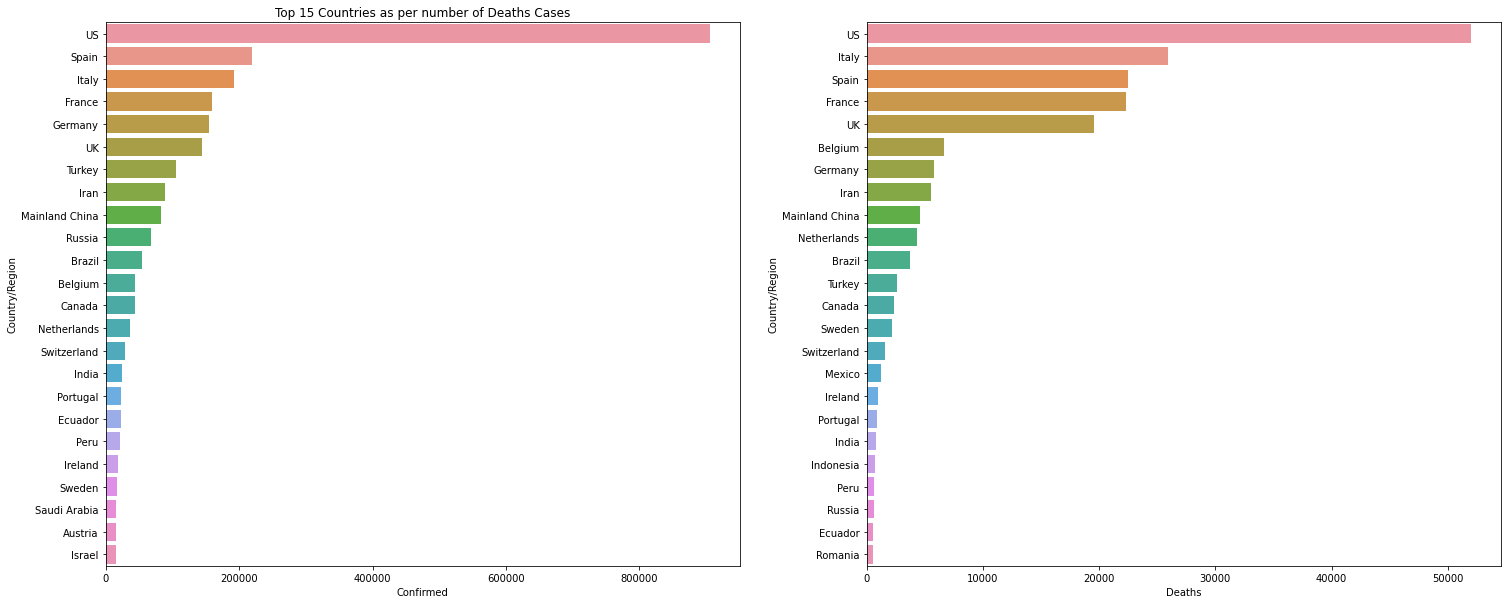

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,10))
top_15confirmed = countrywise.sort_values(["Confirmed"], ascending=False).head(24)
top_15deaths = countrywise.sort_values(["Deaths"], ascending=False).head(24)
sns.barplot(x=top_15confirmed["Confirmed"], y=top_15confirmed.index, ax=ax1)
ax1.set_title("Top 15 Countries as per number of Confirmed Cases")
sns.barplot(x=top_15deaths["Deaths"], y=top_15deaths.index, ax=ax2)
ax1.set_title("Top 15 Countries as per number of Deaths Cases")

In [17]:
# Data Analysis of INDIA
india_data = covid[covid["Country/Region"] == "India"]
datewise_india = india_data.groupby("ObservationDate").agg({"Confirmed":"sum", "Recovered":"sum", "Deaths":"sum"})
print(datewise_india.iloc[-1])
print("Total Active Cases : ", datewise_india["Confirmed"].iloc[-1] - datewise_india["Recovered"].iloc[-1] - datewise_india["Deaths"].iloc[-1])
print("Total Closed Cases : ", datewise_india["Recovered"].iloc[-1] + datewise_india["Deaths"].iloc[-1])

Confirmed    24530.0
Recovered     5498.0
Deaths         780.0
Name: 2020-04-24 00:00:00, dtype: float64
Total Active Cases :  18252.0
Total Closed Cases :  6278.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Weekly Progress of different types of cases')

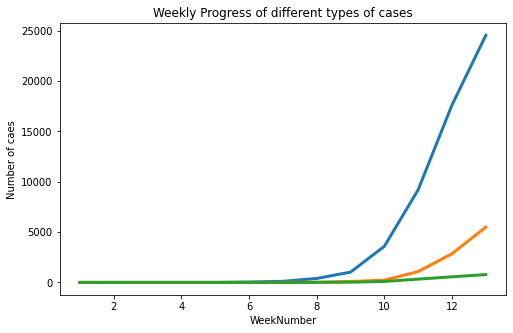

In [18]:
datewise_india["WeekofYear"] = datewise_india.index.weekofyear
week_num_india = []
india_weekwise_confirmed = []
india_weekwise_recovered = []
india_weekwise_deaths = []
w = 1
for i in list(datewise_india["WeekofYear"].unique()):
  india_weekwise_confirmed.append(datewise_india[datewise_india["WeekofYear"]==i]["Confirmed"].iloc[-1])
  india_weekwise_recovered.append(datewise_india[datewise_india["WeekofYear"]==i]["Recovered"].iloc[-1])
  india_weekwise_deaths.append(datewise_india[datewise_india["WeekofYear"]==i]["Deaths"].iloc[-1])
  week_num_india.append(w)
  w = w + 1

plt.figure(figsize=(8,5))
plt.plot(week_num_india, india_weekwise_confirmed, linewidth=3)
plt.plot(week_num_india, india_weekwise_recovered, linewidth=3)
plt.plot(week_num_india, india_weekwise_deaths, linewidth=3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of caes")
plt.title("Weekly Progress of different types of cases")

In [19]:
max_ind = datewise_india["Confirmed"].max()
China_data = covid[covid["Country/Region"] == "Mainland China"]
Italy_data = covid[covid["Country/Region"] == "Italy"]
US_data = covid[covid["Country/Region"] == "US"]
Spain_data = covid[covid["Country/Region"] == "Spain"]

datewise_china = China_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum", "Recovered":"sum", "Deaths":"sum"})
datewise_italy = Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum", "Recovered":"sum", "Deaths":"sum"})
datewise_us = US_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum", "Recovered":"sum", "Deaths":"sum"})
datewise_spain = Spain_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum", "Recovered":"sum", "Deaths":"sum"})

print("It took ", datewise_india[datewise_india["Confirmed"] > 0].shape[0], "days in INDIA to reach", max_ind, "Confirmed Cases")
print("It took ", datewise_italy[(datewise_italy["Confirmed"] > 0) & (datewise_italy["Confirmed"] <= max_ind)].shape[0], "days in ITALY to reach number of Confirmed Cases")
print("It took ", datewise_china[(datewise_china["Confirmed"] > 0) & (datewise_china["Confirmed"] <= max_ind)].shape[0], "days in CHINA to reach number of Confirmed Cases")
print("It took ", datewise_spain[(datewise_spain["Confirmed"] > 0) & (datewise_spain["Confirmed"] <= max_ind)].shape[0], "days in SPAIN to reach number of Confirmed Cases")
print("It took ", datewise_us[(datewise_us["Confirmed"] > 0) & (datewise_us["Confirmed"] <= max_ind)].shape[0], "days in US to reach number of Confirmed Cases")

It took  86 days in INDIA to reach 24530.0 Confirmed Cases
It took  44 days in ITALY to reach number of Confirmed Cases
It took  14 days in CHINA to reach number of Confirmed Cases
It took  49 days in SPAIN to reach number of Confirmed Cases
It took  59 days in US to reach number of Confirmed Cases


In [21]:
datewise["Days Since"] = datewise.index-datewise.index[0]
datewise["Days Since"] = datewise["Days Since"].dt.days
train_ml = datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml = datewise.iloc[:int(datewise.shape[0]*0.95):]
model_scores = []

In [24]:
line_reg = LinearRegression(normalize=True)
svm = SVR(C=1, degree=5, kernel='poly', epsilon=0.001)
line_reg.fit(np.array(train_ml["Days Since"]).reshape(-1, 1), np.array(train_ml["Confirmed"]).reshape(-1, 1))
svm.fit(np.array(train_ml["Days Since"]).reshape(-1, 1), np.array(train_ml["Confirmed"]).reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.001, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [25]:
prediction_valid_line_reg = line_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1, 1))
prediction_valid_svm = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1, 1))

In [27]:
new_date = []
new_prediction_lr = []
new_prediction_svm = []
for i in range(1, 18):
  new_date.append(datewise.index[-1] + timedelta(days=i))
  new_prediction_lr.append(line_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format", lambda x: '%.f' % x)
model_predictions = pd.DataFrame(zip(new_date, new_prediction_lr, new_prediction_svm), columns=["Dates", "LR", "SVR"])
model_predictions.head(10)

,Dates,LR,SVR
0,2020-04-25,1560529,3322586
1,2020-04-26,1582219,3500761
2,2020-04-27,1603909,3686599
3,2020-04-28,1625599,3880344
4,2020-04-29,1647289,4082245
5,2020-04-30,1668980,4292557
6,2020-05-01,1690670,4511540
7,2020-05-02,1712360,4739461
8,2020-05-03,1734050,4976588
9,2020-05-04,1755740,5223200


In [29]:
model_train = datewise.iloc[:int(datewise.shape[0]*0.85)]
valid = datewise.iloc[int(datewise.shape[0]*0.85):]

In [30]:
holt = Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=1.4, smoothing_slope=0.2)
y_pred = valid.copy()
y_pred["Holt"] = holt.forecast(len(valid))

In [31]:
holt_new_date = []
holt_new_prediction = []
for i in range(1, 18):
  holt_new_date.append((datewise.index[-1] + timedelta(days=i)))
  holt_new_prediction.append(holt.forecast(len(valid) + i)[-1])
model_predictions["Holts Linear Model Prediction"] = holt_new_prediction
model_predictions.head()

,Dates,LR,SVR,Holts Linear Model Prediction
0,2020-04-25,1560529,3322586,2855246
1,2020-04-26,1582219,3500761,2933902
2,2020-04-27,1603909,3686599,3012558
3,2020-04-28,1625599,3880344,3091214
4,2020-04-29,1647289,4082245,3169870
